In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

possible_n_vals = [10, 12, 14, 16]
possible_e_vals = [1, 2, 3, 4, 5]


def run_poly_logistic_regression(n, e):

    X = np.load('Datasets/kryptonite-%s-X.npy'%(n))
    y = np.load('Datasets/kryptonite-%s-y.npy'%(n))

    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)  # 60% training
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test
    print(X_train.shape)
    # Create polynomial features (set degree as desired)
    degree = e
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)
    print(X_train_poly.shape)
    features = X_train_poly.shape[-1]
    print("Created features")

    # Initialize and fit logistic regression
    logreg = LogisticRegression(max_iter=100, solver='sag', C=0.85)
    logreg.fit(X_train_poly, y_train)
    print("Fit Model")

    # Evaluate on the validation set
    y_val_pred = logreg.predict(X_val_poly)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Evaluate on the test set
    y_test_pred = logreg.predict(X_test_poly)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy, features
        

In [2]:
from tqdm import tqdm
"""
acc_by_n = []
feat_by_n = []
for n in tqdm(possible_n_vals):
    single_n = []
    single_feat = []
    for e in tqdm(possible_e_vals):
        acc, feat = run_poly_logistic_regression(n, e)
        single_n.append(acc)
        single_feat.append(feat)
    acc_by_n.append(single_n)
    feat_by_n.append(single_feat)

print(acc_by_n)
"""

'\nacc_by_n = []\nfeat_by_n = []\nfor n in tqdm(possible_n_vals):\n    single_n = []\n    single_feat = []\n    for e in tqdm(possible_e_vals):\n        acc, feat = run_poly_logistic_regression(n, e)\n        single_n.append(acc)\n        single_feat.append(feat)\n    acc_by_n.append(single_n)\n    feat_by_n.append(single_feat)\n\nprint(acc_by_n)\n'

In [5]:

n_values = [10, 12, 14, 16]

p_values = [1,2,3,4, 5]

presolved_acc_by_n = [[0.5201666666666667, 0.5131666666666667, 0.49416666666666664, 0.49983333333333335, 0.505], [0.5018055555555555, 0.5088888888888888, 0.5008333333333334, 0.5101388888888889, 0.5151388888888889], [0.51, 0.5059523809523809, 0.4963095238095238, 0.5021428571428571, 0.501547619047619], [0.5066666666666667, 0.4984375, 0.49635416666666665, 0.49614583333333334, 0.49916666666666665]]

presolved_feat_by_n = [[11, 66, 286, 1001, 3003], [13, 91, 455, 1820, 6188], [15, 120, 680, 3060, 11628], [17, 153, 969, 4845, 20349]]




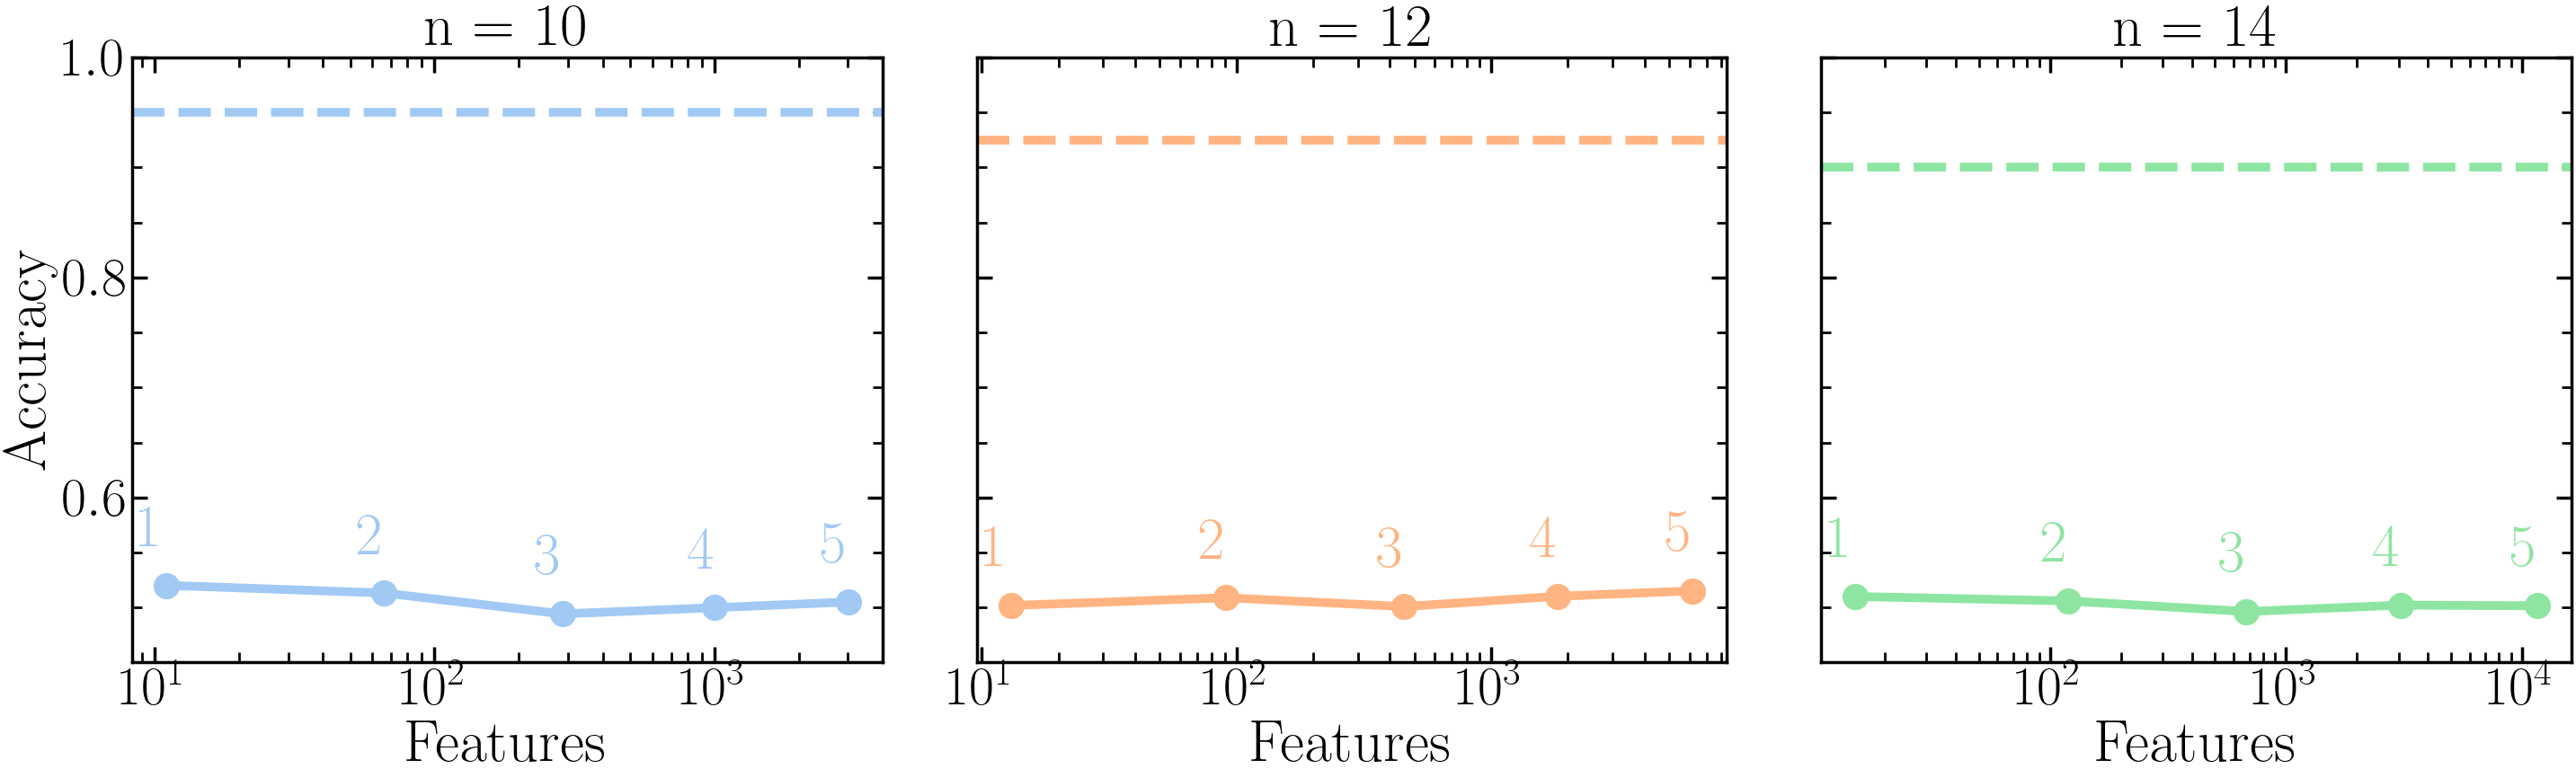

In [10]:
import matplotlib.pyplot as plt
import scienceplots  
plt.style.use('science')
import seaborn as sns
import numpy as np

# Data
possible_n_vals = [10, 12, 14]
possible_e_vals = [1,2,3,4,5,6,7]
n_values = [10, 12, 14, 16]
# Plot style
sns.set_context("poster", font_scale=2.0)
colors = sns.color_palette("pastel", 3)  # Pastel color palette

success_hlines = [0.95, 0.925, 0.9]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharey=True)

# Plot each n-value in its own subplot
for i, (n, ax) in enumerate(zip(n_values, axes)):
    ax.plot(presolved_feat_by_n[i], presolved_acc_by_n[i], marker='o', label=f'n = {n}', color=colors[i],
           lw=7, markersize=20)
    
    # Annotating with p-values in the same color as the line
    for j, (x, y) in enumerate(zip(presolved_feat_by_n[i], presolved_acc_by_n[i])):
        ax.text(x, y+0.025, f'{p_values[j]}',  ha='right', va='bottom', color=colors[i])
    
    ax.axhline(success_hlines[i], color=colors[i], linestyle='--', lw=7)
    # Customizing each subplot
    ax.set_title(f'n = {n}')
    ax.set_xlabel("Features")
    if i == 0:
        ax.set_ylabel("Accuracy")
    ax.set_xscale('log')
    
# Adjust layout
plt.tight_layout()
plt.ylim((0.45, 1.0))

# Show the plot
plt.show()

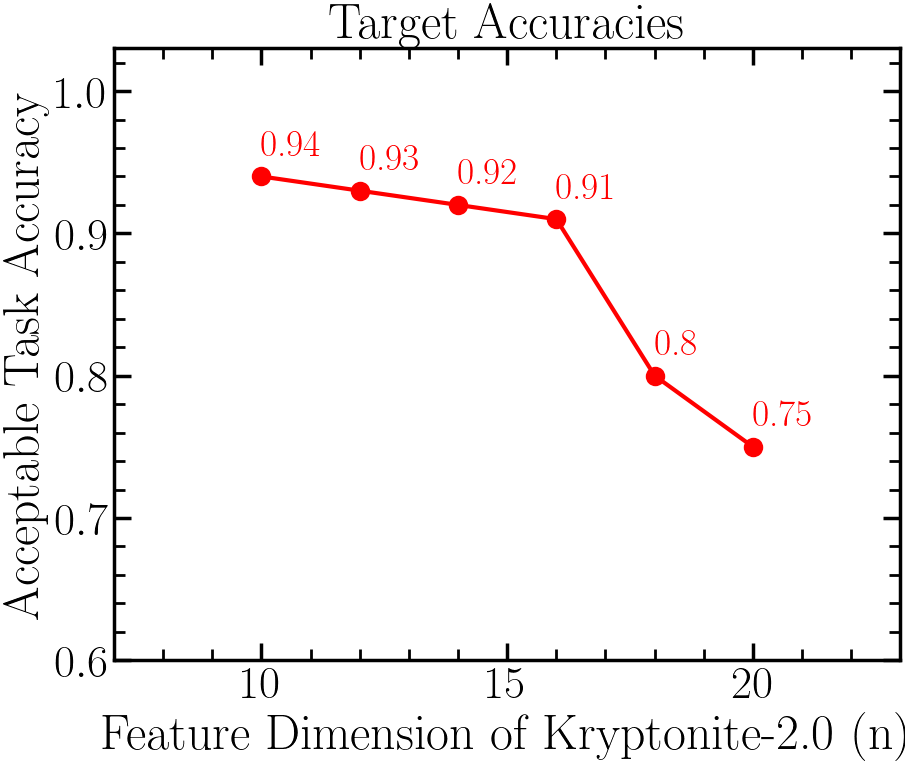

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data

# Plot style
sns.set_context("poster", font_scale=1.5)
plt.figure(figsize=(10,8))

n = [10,12,14, 16,18,20]
succ = [0.94, 0.93, 0.92, 0.91, 0.8, 0.75]
plt.plot(n, succ, c='r')
plt.scatter(x=n, y=succ, c='r') 

ax = plt.gca()
# Annotating with p-values in the same color as the line
for j, (x, y) in enumerate(zip(n, succ)):
    ax.text(x, y+0.01, f'{succ[j]}',  ha='left', va='bottom', color='r', size=27)
        
# Adjust layout
plt.tight_layout()
plt.ylim((0.6, 1.03))
plt.xlim((7, 23))
# Show the plot

plt.title("Target Accuracies")
plt.ylabel("Acceptable Task Accuracy")
plt.xlabel("Feature Dimension of Kryptonite-2.0 (n)")
plt.show()